<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn

random.seed(42)
np.random.seed(42)

In [2]:
import re

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы случайный результат был воспроизводимым.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [5]:
sample = df_train.sample(n = 10)
display(sample)
display(df_test.head())
display(df_test.tail())
print(df_test.isna().sum()) #количество пропусков по столбцам
print(df_train.isna().sum()) #количество пропусков по столбцам
cols_with_na = df_train.columns[df_train.isna().any()]
print(cols_with_na) #столбцы с пропусками
print('Количество дубликатов в трейне: ', df_train.duplicated().sum()) # запросим количество дубликатов
print('Количество дубликатов в тесте: ', df_test.duplicated().sum()) # запросим количество дубликатов

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64
Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')
Количество дубликатов в трейне:  985
Количество дубликатов в тесте:  62


In [6]:
!pip install sweetviz

In [7]:
import sweetviz as sv
report = sv.analyze(df_train)
# Display the report
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

От пропусков избавимся позже, так как для поиска медаиан нужно чтобы столбцы были числовых типов.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [8]:
print('Количество дубликатов не считая целевую переменную: ', df_train.drop('selling_price', axis = 1).duplicated().sum()) # запросим количество дубликатов ещё раз
display(df_train[df_train.drop('selling_price', axis = 1).duplicated()])
check_cols = df_train.drop('selling_price', axis = 1).columns
df_train = df_train.drop_duplicates(subset = check_cols, keep = 'first').reset_index(drop=True) # удалим дубликаты
print(df_train.duplicated().sum()) # проверим что дубликатов не осталось
print(df_train.shape) # проверим что дубликатов не осталось

Количество дубликатов не считая целевую переменную:  1159


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


0
(5840, 13)


In [9]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [10]:
def clearing(row, pattern):
    row = row.strip()
    result = re.findall(pattern, row)
    if result:  
        return result[0]
    return None

In [11]:
df_train['mileage'] = df_train[~df_train['mileage'].isna()]['mileage'].apply(clearing, pattern = r'(\d+\.\d+)')
df_train['engine'] = df_train[~df_train['engine'].isna()]['engine'].apply(clearing, pattern = r'(\d+)')
df_train['max_power'] = df_train[~df_train['max_power'].isna()]['max_power'].apply(clearing, pattern = r'(\d+\.?\d+)')
display(df_train.head(2))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0


In [12]:
df_test['mileage'] = df_test[~df_test['mileage'].isna()]['mileage'].apply(clearing, pattern = r'(\d+\.\d+)')
df_test['engine'] = df_test[~df_test['engine'].isna()]['engine'].apply(clearing, pattern = r'(\d+)')
df_test['max_power'] = df_test[~df_test['max_power'].isna()]['max_power'].apply(clearing, pattern = r'(\d+\.?\d+)')
display(df_test.head(2))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260Nm@ 1500-2750rpm,5.0


In [13]:
try:
    df_train['mileage'] = df_train['mileage'].astype('float') # изменим на float
    df_train['engine'] = df_train['engine'].astype('float') # изменим на float
    df_train['max_power'] = df_train['max_power'].astype('float') # изменим на float
    df_test['mileage'] = df_test['mileage'].astype('float') # изменим на float
    df_test['engine'] = df_test['engine'].astype('float') # изменим на float
    df_test['max_power'] = df_test['max_power'].astype('float') # изменим на float
except:
    print('Проверьте значения в столбце')

In [14]:
df_train = df_train.drop('torque', axis = 1)
df_test = df_test.drop('torque', axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5653 non-null   float64
 11  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

Пришло время заполнить пропуски!

In [15]:
cols_with_na = df_train.columns[df_train.isna().any()]
for col in cols_with_na:
    med = df_train[col].median()
    df_train[col] = df_train[col].fillna(med)
    df_test[col] = df_test[col].fillna(med)
print(df_test.isna().sum()) #количество пропусков по столбцам
print(df_train.isna().sum()) #количество пропусков по столбцам

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [16]:
try:
    df_train['seats'] = df_train['seats'].astype('int') # изменим на int
    df_train['engine'] = df_train['engine'].astype('int') # изменим на int
    
    df_test['mileage'] = df_test['mileage'].astype('int') # изменим на int
    df_test['engine'] = df_test['engine'].astype('int') # изменим на int
except:
    print('Проверьте значения в столбце')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int32  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 502.0+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [18]:
display(round(df_train.describe(),3))
display(round(df_test.describe(),3))
display(df_train.describe(include = 'object'))
display(df_test.describe(include = 'object')) 
print('На прошлом шаге удалили столбец "torque", поэтому размер фрейма =', df_train.shape) 

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000,5.840000e+03,5840.000,5840.000,5840.000,5840.000,5840.000
mean,2013.428,5.229601e+05,73952.242,19.431,1429.449,87.948,5.427
std,4.096,5.354320e+05,60071.137,3.986,485.663,31.578,0.982
min,1983.000,2.999900e+04,1.000,0.000,624.000,32.800,2.000
25%,2011.000,2.500000e+05,39000.000,16.950,1197.000,68.000,5.000
50%,2014.000,4.050000e+05,70000.000,19.370,1248.000,81.860,5.000
75%,2017.000,6.400000e+05,100000.000,22.300,1498.000,99.000,5.000
max,2020.000,1.000000e+07,2360457.000,42.000,3604.000,400.000,14.000


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,2013.681,617901.042,71393.341,18.912,1454.876,90.842,5.403
std,4.012,758553.861,48486.219,3.986,521.996,34.893,0.913
min,1995.000,31000.000,1303.000,0.000,624.000,34.200,4.000
25%,2011.000,250000.000,37000.000,16.000,1197.000,69.000,5.000
50%,2014.000,434999.000,61500.000,19.000,1248.000,82.425,5.000
75%,2017.000,670000.000,100000.000,22.000,1582.000,102.000,5.000
max,2020.000,6000000.000,375000.000,32.000,3604.000,280.000,9.000


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


На прошлом шаге удалили столбец "torque", поэтому размер фрейма = (5840, 12)


In [19]:
#assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

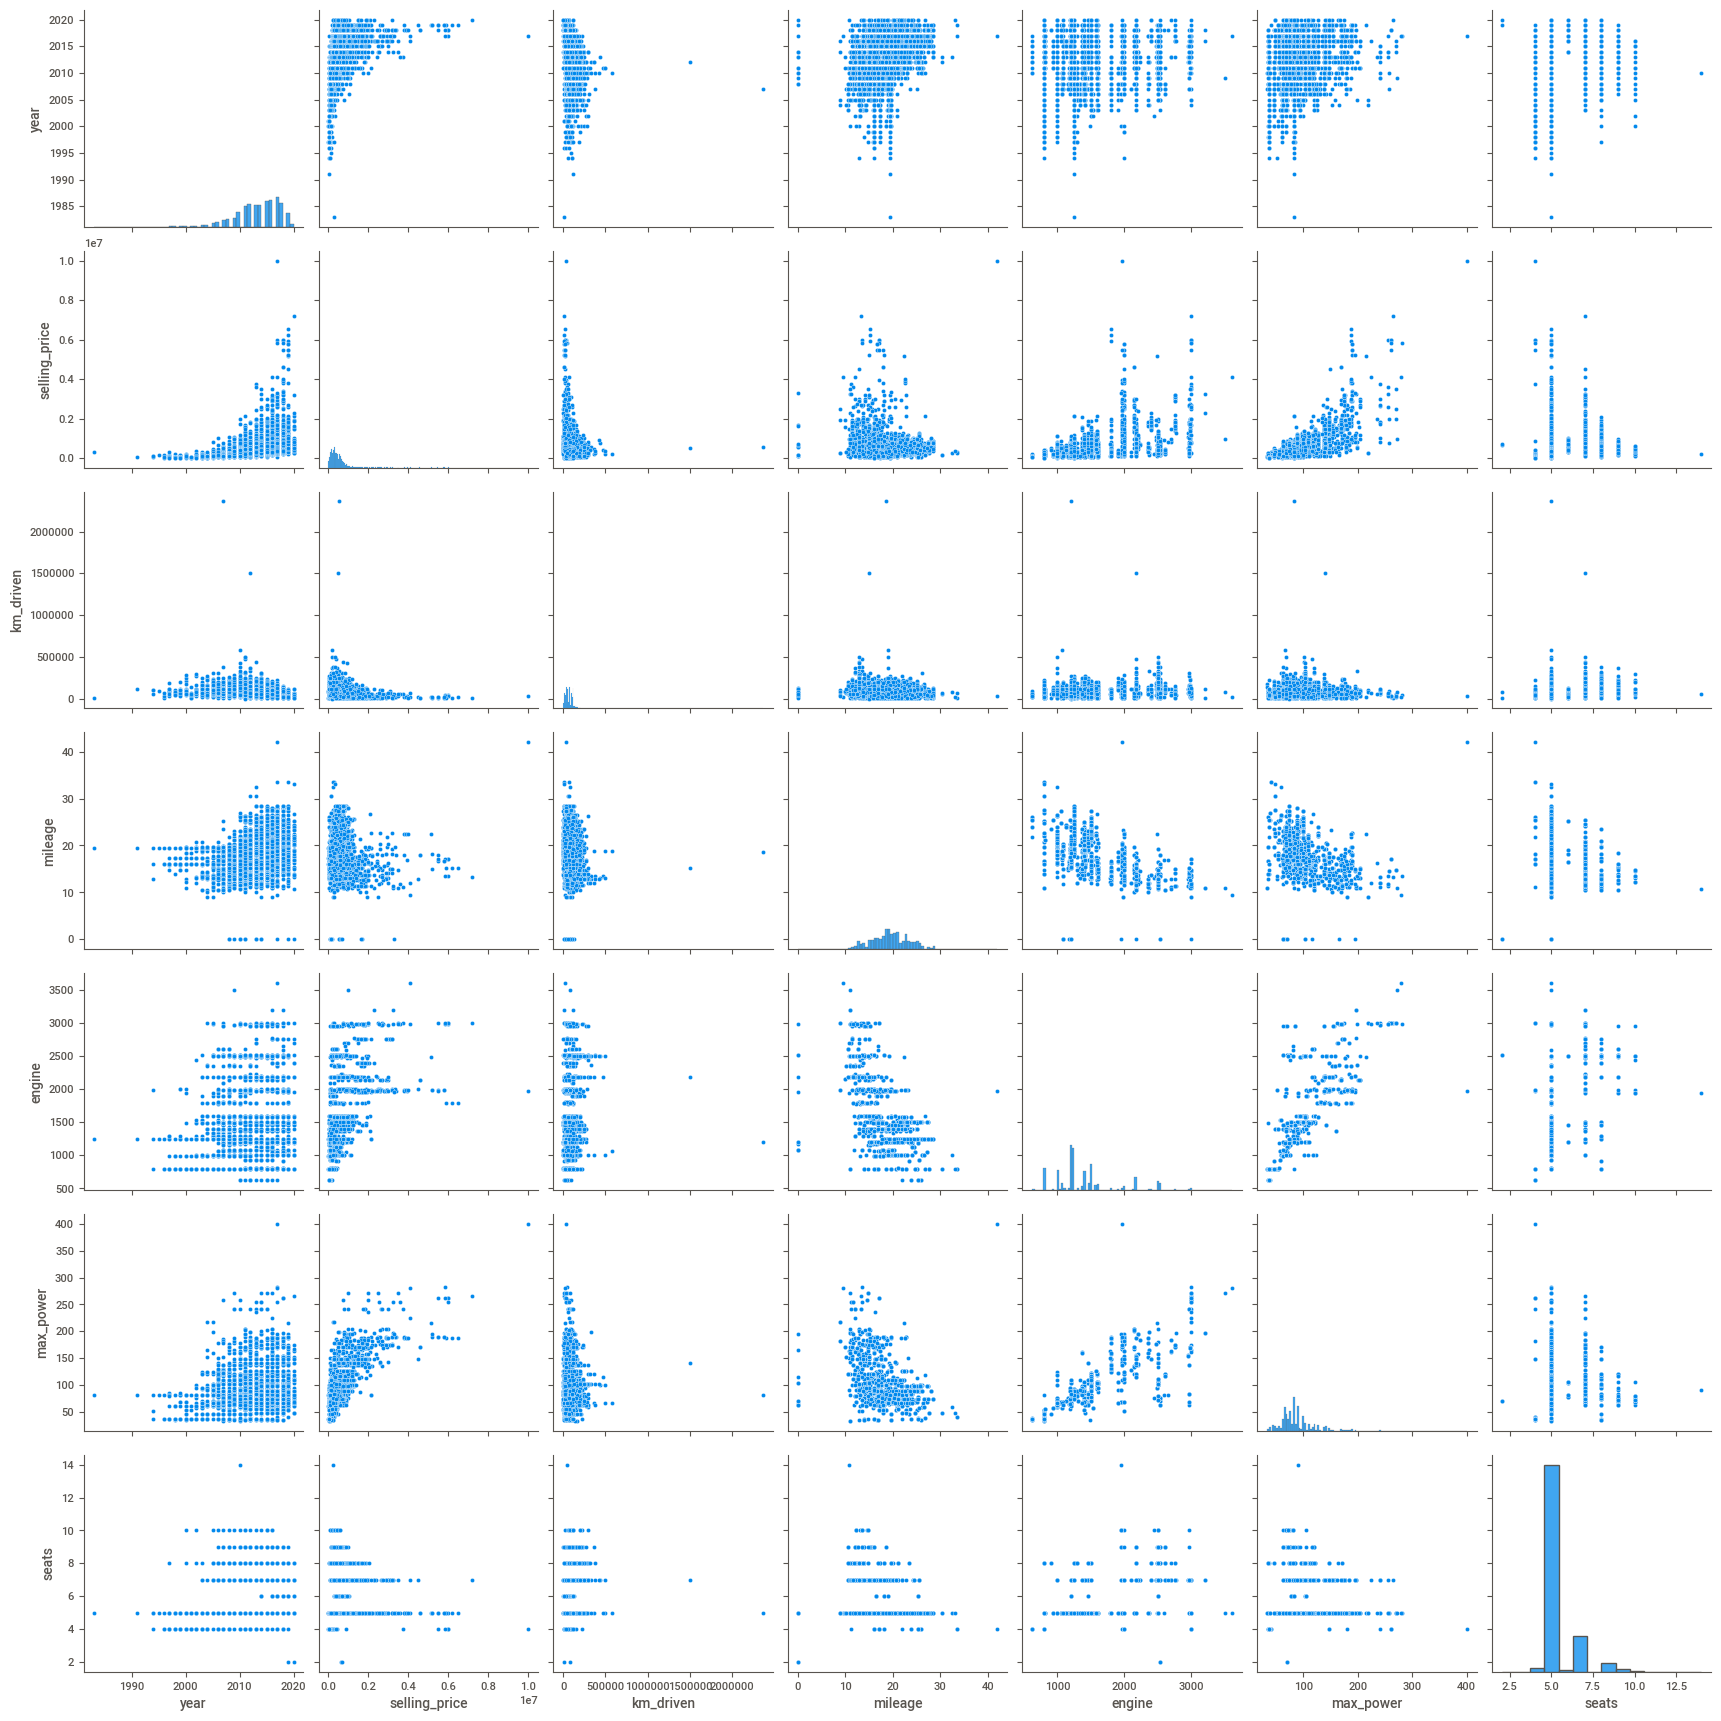

In [20]:
sns.pairplot(df_train)
plt.show()

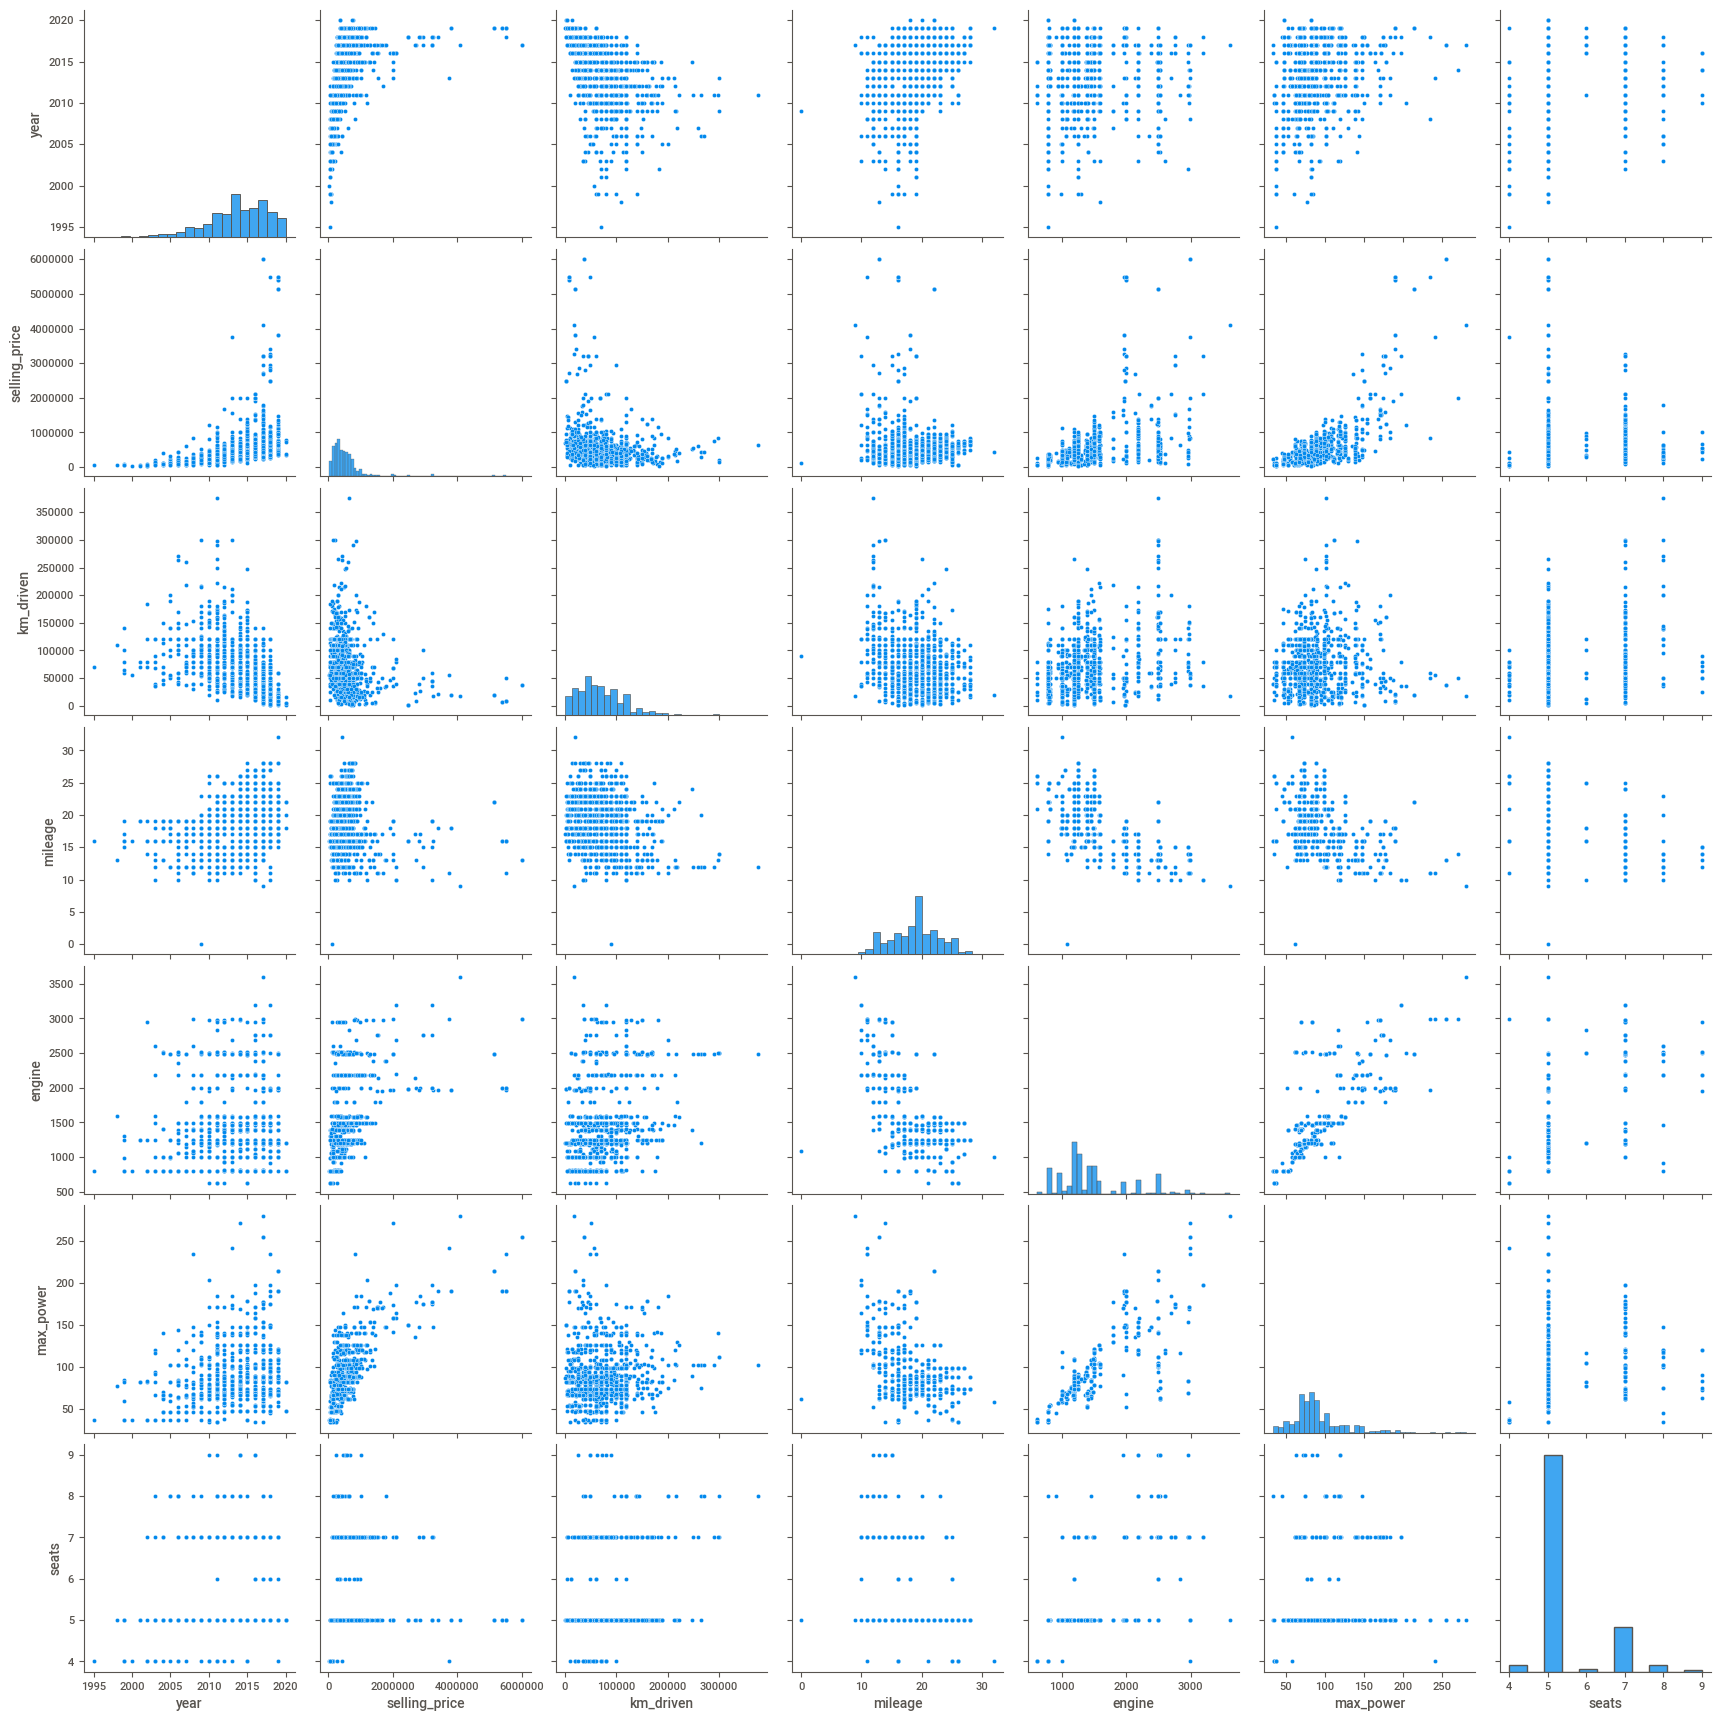

In [21]:
sns.pairplot(df_test)
plt.show()

##### Ответ
###### Шаг 1.
- Можно наблюдать явную связь целевой переменной и таких признаков как: год, мощность.
- Визуально можно отметить пару объём двигателя/максимальная мощность, но это и логично! Удивляет распределение между парой год/пробег.

###### Шаг 2.
- Совокупности похожи, но тест гораздо более расеянный(разряженный).

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [22]:
cor = df_train.corr()
display(cor)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.157138,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.693742,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024539,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.374150,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681968,0.652172
max_power,0.157138,0.693742,0.024539,-0.374150,0.681968,1.000000,0.244017
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244017,1.000000


<AxesSubplot:>

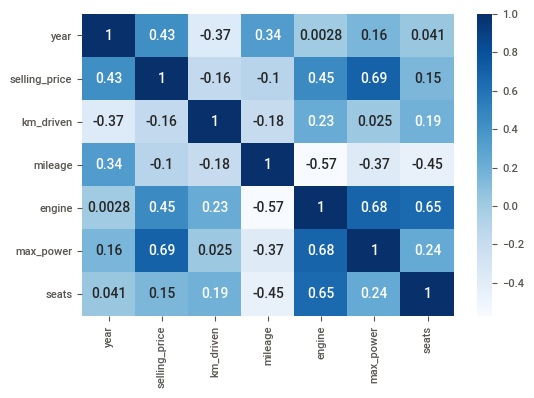

In [23]:
sns.heatmap(cor, cmap = 'Blues', annot= True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Ответы:
- engine и year имеют наименьшую корреляцию в 0.0028
- max_power и selling_price, а также max_power и engine
- между признаками km_driven и year существует отрицательная корреляция, но не самая сильная.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Также будет полезно посмотреть на карелляцию между категориальными признаками.

Выведем её одним из изветсных способов и построим график.

In [24]:
!pip install association_metrics

In [25]:
import association_metrics as am

df_cat = df_train.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

corr_cat = cramersv.fit()
display(corr_cat)

,name,fuel,seller_type,transmission,owner
name,1.000000,1.000000,0.728837,1.000000,0.719636
fuel,1.000000,1.000000,0.052872,0.042164,0.036350
seller_type,0.728837,0.052872,1.000000,0.212261,0.136822
transmission,1.000000,0.042164,0.212261,1.000000,0.121475
owner,0.719636,0.036350,0.136822,0.121475,1.000000


<AxesSubplot:>

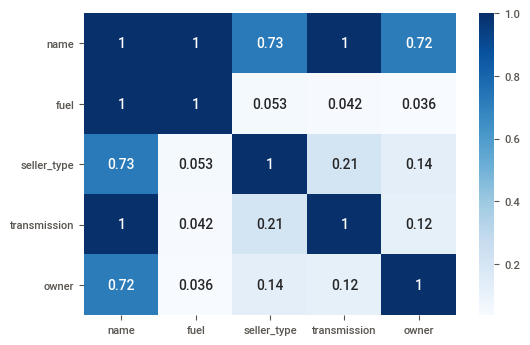

In [26]:
sns.heatmap(corr_cat, cmap = 'Blues', annot= True)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int32  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 502.0+ KB


In [28]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [29]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(exclude=['object']).drop('selling_price', axis = 1)

In [30]:
assert X_train.shape == (5840, 6)

In [31]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(exclude=['object']).drop('selling_price', axis = 1)

In [32]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions_train_1 = model_1.predict(X_train)
predictions_test_1 = model_1.predict(X_test)

value_r2_train_1 = r2_score(y_train, predictions_train_1)
value_r2_test_1 = r2_score(y_test, predictions_test_1)

value_mse_train_1 = MSE(y_train, predictions_train_1)
value_mse_test_1 = MSE(y_test, predictions_test_1)
print(f"MSE модели линейной регрессии на тренировочной выборке: {round(value_mse_train_1,3)}; R2 модели линейной регрессии на тренировочной выборке: {round(value_r2_train_1,3)}")
print(f"MSE модели линейной регрессии на тестовой выборке: {round(value_mse_test_1,3)}; R2 модели линейной регрессии на тестовой выборке: {round(value_r2_test_1,3)}")

MSE модели линейной регрессии на тренировочной выборке: 116601673169.11; R2 модели линейной регрессии на тренировочной выборке: 0.593
MSE модели линейной регрессии на тестовой выборке: 233484868905.511; R2 модели линейной регрессии на тестовой выборке: 0.594


По MSE судить сложно, метрику сложно интерпетировать. Но видно что результат на тренировочных данных в 2 раза лучше, чем на тестовых.

При этом по метрике R2 результат идентичный - 0.59. Неплохое значение метрики, но можно улучишь, желательно побить порог в 0.8

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
X_train.head(2)  # посмотрим на данные

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5


In [35]:
from sklearn.preprocessing import StandardScaler
num_feats = X_train.columns

scaler = StandardScaler() # создадим объект
scaler.fit(X_train[num_feats]) # обучим объект
X_train[num_feats] = scaler.transform(X_train[num_feats]) # произведём масштабирование
X_test[num_feats] = scaler.transform(X_test[num_feats]) # произведём масштабирование

display(X_train.head(2)) # посмотрим на результат
display(X_test.head(2)) # посмотрим на результат

,year,km_driven,mileage,engine,max_power,seats
0,0.13957,1.191152,0.995867,-0.373643,-0.441753,-0.434419
1,0.13957,0.766619,0.428830,0.141162,0.493159,-0.434419


,year,km_driven,mileage,engine,max_power,seats
0,-0.837167,1.565740,-1.362605,2.200379,0.761724,1.601702
1,0.872122,-0.814974,0.393704,0.139102,0.650878,-0.434419


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

Учитывая контекст вопроса, видимо нf предидущем шаге нужно было обучить модель заного.
Хотя это не требовалось явно..
Сделаем этого!

In [36]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions_train_2 = model_2.predict(X_train)
predictions_test_2 = model_2.predict(X_test)

value_r2_train_2 = r2_score(y_train, predictions_train_2)
value_r2_test_2 = r2_score(y_test, predictions_test_2)

value_mse_train_2 = MSE(y_train, predictions_train_2)
value_mse_test_2 = MSE(y_test, predictions_test_2)
print(f"MSE модели линейной регрессии на тренировочной выборке: {round(value_mse_train_2,3)}; R2 модели линейной регрессии на тренировочной выборке: {round(value_r2_train_2,3)}")
print(f"MSE модели линейной регрессии на тестовой выборке: {round(value_mse_test_2,3)}; R2 модели линейной регрессии на тестовой выборке: {round(value_r2_test_2,3)}")

MSE модели линейной регрессии на тренировочной выборке: 116601673169.11; R2 модели линейной регрессии на тренировочной выборке: 0.593
MSE модели линейной регрессии на тестовой выборке: 233484868905.501; R2 модели линейной регрессии на тестовой выборке: 0.594


In [37]:
print(model_2.coef_)

[152247.33086876 -44066.18021284  29319.18102634  59324.98036527
 324496.85782122 -22159.18786684]


Признак max_power имеет наибольший коэффициент.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [38]:
from sklearn.linear_model import Lasso

model_3 = Lasso()
model_3.fit(X_train, y_train)
predictions_train_3 = model_3.predict(X_train)
predictions_test_3 = model_3.predict(X_test)

value_r2_train_3 = r2_score(y_train, predictions_train_3)
value_r2_test_3 = r2_score(y_test, predictions_test_3)

value_mse_train_3 = MSE(y_train, predictions_train_3)
value_mse_test_3 = MSE(y_test, predictions_test_3)
print(f"MSE модели Lasso на тренировочной выборке: {round(value_mse_train_3,3)}; R2 модели линейной регрессии на тренировочной выборке: {round(value_r2_train_3,3)}")
print(f"MSE модели Lasso на тестовой выборке: {round(value_mse_test_3,3)}; R2 модели линейной регрессии на тестовой выборке: {round(value_r2_test_3,3)}")

MSE модели Lasso на тренировочной выборке: 116601673179.236; R2 модели линейной регрессии на тренировочной выборке: 0.593
MSE модели Lasso на тестовой выборке: 233485509003.161; R2 модели линейной регрессии на тестовой выборке: 0.594


In [39]:
print(model_3.coef_)

[152247.14742736 -44065.05085353  29317.30055383  59320.137094
 324497.75189092 -22156.30524519]


Результаты по метрикам незначительно ухудшились.
Коэффициенты модели именились незначительно, зануления не произошло. Думаю из-за дефолтных настроек.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [40]:
from sklearn.model_selection import GridSearchCV
X_train = pd.concat([X_train, X_test], ignore_index=True)
y_train = pd.concat([y_train, y_test], ignore_index=True)

In [41]:
%%time
lasso = Lasso()
parameters = {'alpha':[1e-3,0.05,0.1,0.2,0.5,1,100,1000,5000,10000, 20000]}
lasso_regressor = GridSearchCV(lasso, param_grid=parameters, cv=10, scoring = 'r2')
lasso_regressor.fit(X_train, y_train)
print(f'Лучшие гиперпараметры модели Lasso:{lasso_regressor.best_params_} при значении метрики {lasso_regressor.best_score_}')
res = pd.DataFrame(lasso_regressor.cv_results_)
display(res)

Лучшие гиперпараметры модели Lasso:{'alpha': 20000} при значении метрики 0.5830563729481241


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005502,0.004593,0.000400,0.000801,0.001,{'alpha': 0.001},0.602561,0.619932,0.556097,0.540589,0.590785,0.546877,0.579915,0.582507,0.595833,0.596116,0.581121,0.024384,11
1,0.005892,0.007552,0.000400,0.001201,0.050,{'alpha': 0.05},0.602561,0.619932,0.556097,0.540590,0.590785,0.546877,0.579915,0.582507,0.595833,0.596116,0.581121,0.024384,10
2,0.003224,0.006204,0.003064,0.006130,0.100,{'alpha': 0.1},0.602561,0.619932,0.556097,0.540590,0.590785,0.546877,0.579915,0.582507,0.595833,0.596116,0.581121,0.024384,9
3,0.003916,0.006148,0.002414,0.005085,0.200,{'alpha': 0.2},0.602561,0.619932,0.556097,0.540590,0.590785,0.546877,0.579915,0.582507,0.595832,0.596116,0.581121,0.024384,8
4,0.000251,0.000753,0.002815,0.004965,0.500,{'alpha': 0.5},0.602561,0.619932,0.556097,0.540591,0.590785,0.546877,0.579915,0.582507,0.595832,0.596116,0.581121,0.024383,7
5,0.004013,0.005440,0.001563,0.004689,1.000,{'alpha': 1},0.602560,0.619932,0.556098,0.540593,0.590785,0.546877,0.579916,0.582508,0.595832,0.596115,0.581122,0.024383,6
6,0.004176,0.006515,0.000551,0.001107,100.000,{'alpha': 100},0.602459,0.619892,0.556240,0.540953,0.590841,0.546878,0.580042,0.582559,0.595787,0.596027,0.581168,0.024287,5
7,0.000000,0.000000,0.003125,0.006251,1000.000,{'alpha': 1000},0.601519,0.619493,0.557479,0.544150,0.591304,0.546865,0.581138,0.583005,0.595355,0.595214,0.581552,0.023440,4
8,0.003125,0.006251,0.001601,0.004477,5000.000,{'alpha': 5000},0.597000,0.616873,0.561879,0.557309,0.592322,0.546330,0.585015,0.584342,0.592883,0.591276,0.582523,0.020127,2
9,0.002351,0.004119,0.000850,0.002551,10000.000,{'alpha': 10000},0.592669,0.611711,0.564821,0.571034,0.591240,0.544534,0.587586,0.584486,0.588554,0.585913,0.582255,0.017309,3


CPU times: total: 3.86 s
Wall time: 586 ms


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
%%time
elastic = ElasticNet()

parameters = {'alpha': [0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
                
elastic_regressor = GridSearchCV(elastic, param_grid=parameters, cv=10, scoring = 'r2')
elastic_regressor.fit(X_train, y_train)
print(f'Лучшие гиперпараметры модели ElasticNet:{elastic_regressor.best_params_} при значении метрики {elastic_regressor.best_score_}')
res_el = pd.DataFrame(elastic_regressor.cv_results_)
display(res_el)

Лучшие гиперпараметры модели ElasticNet:{'alpha': 0.08, 'l1_ratio': 0.1} при значении метрики 0.5862107254969503


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003861,0.004614,0.000735,0.000956,0.00005,0.1,"{'alpha': 5e-05, 'l1_ratio': 0.1}",0.602549,0.619946,0.556115,0.540598,0.590800,0.546875,0.579929,0.582517,0.595830,0.596108,0.581127,0.024382,53
1,0.005166,0.006570,0.001101,0.002377,0.00005,0.2,"{'alpha': 5e-05, 'l1_ratio': 0.2}",0.602550,0.619944,0.556113,0.540597,0.590798,0.546875,0.579927,0.582516,0.595830,0.596109,0.581126,0.024382,54
2,0.003176,0.006354,0.003151,0.005265,0.00005,0.3,"{'alpha': 5e-05, 'l1_ratio': 0.3}",0.602551,0.619943,0.556111,0.540596,0.590797,0.546876,0.579926,0.582515,0.595831,0.596110,0.581125,0.024382,56
3,0.006328,0.006208,0.000000,0.000000,0.00005,0.4,"{'alpha': 5e-05, 'l1_ratio': 0.4}",0.602553,0.619941,0.556109,0.540595,0.590795,0.546876,0.579924,0.582514,0.595831,0.596111,0.581125,0.024382,58
4,0.004477,0.006980,0.001251,0.003754,0.00005,0.5,"{'alpha': 5e-05, 'l1_ratio': 0.5}",0.602554,0.619940,0.556107,0.540594,0.590793,0.546876,0.579922,0.582513,0.595831,0.596112,0.581124,0.024383,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000851,0.002100,0.004164,0.006432,100.00000,0.5,"{'alpha': 100, 'l1_ratio': 0.5}",0.017455,0.041169,0.032276,0.042396,0.042080,0.028868,0.031105,0.038484,0.031401,0.014906,0.032014,0.009223,140
140,0.001562,0.004687,0.000450,0.001351,100.00000,0.6,"{'alpha': 100, 'l1_ratio': 0.6}",0.023834,0.051798,0.043844,0.052403,0.053058,0.036111,0.042382,0.048391,0.039092,0.021871,0.041279,0.010696,138
141,0.001563,0.004690,0.003414,0.005950,100.00000,0.7,"{'alpha': 100, 'l1_ratio': 0.7}",0.034148,0.068870,0.062398,0.068475,0.070673,0.047791,0.060485,0.064301,0.051497,0.033121,0.056176,0.013247,135
142,0.001600,0.004324,0.001201,0.003602,100.00000,0.8,"{'alpha': 100, 'l1_ratio': 0.8}",0.053667,0.100779,0.096987,0.098507,0.103535,0.069782,0.094290,0.094032,0.074861,0.054367,0.084081,0.018255,132


CPU times: total: 52.5 s
Wall time: 8.1 s


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [44]:
df_train = df_train_copy
df_test = df_test_copy

In [45]:
df_train = pd.concat([df_train, df_test], ignore_index=True) 
print('Объединим выборки, так как далее будет ипользовать кросс-валидацию для модели Ridge')

Объединим выборки, так как далее будет ипользовать кросс-валидацию для модели Ridge


In [46]:
print(df_train['name'].unique())
print(len(df_train['name'].unique()))

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Hyundai i20 Sportz Diesel' ... 'Maruti Swift Dzire LXi'
 'Honda Accord VTi-L MT' 'Hyundai i20 Era Diesel']
2045


Очень много уникальных наименований, модель была бы слишком сложной.
Но мы попробуем обработать стобец "name"

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [47]:
def partition_name(row, part):
    row = row.strip()
    result = list(row.split(' '))
    if result and part == 1:
        return result[0]
    if len(result) > 1 and part == 2:
        return result[0] + ' ' +  result[1]    
    return None

In [48]:
df_train['name_1'] = df_train[~df_train['name'].isna()]['name'].apply(partition_name, part = 1)
df_train['name_2'] = df_train[~df_train['name'].isna()]['name'].apply(partition_name, part = 2)
print(df_train['name_1'].unique())
print(len(df_train['name_1'].unique()))
print(df_train['name_2'].unique())
print(len(df_train['name_2'].unique()))

['Maruti' 'Skoda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra' 'Honda'
 'Chevrolet' 'Fiat' 'Datsun' 'Tata' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Isuzu' 'Peugeot' 'Opel' 'Ashok']
32
['Maruti Swift' 'Skoda Rapid' 'Hyundai i20' 'Hyundai Xcent' 'Maruti Wagon'
 'Maruti 800' 'Toyota Etios' 'Ford Figo' 'Renault Duster' 'Maruti Zen'
 'Mahindra KUV' 'Maruti Alto' 'Mahindra Verito' 'Honda WR-V' 'Maruti SX4'
 'Maruti Baleno' 'Chevrolet Enjoy' 'Maruti Omni' 'Maruti Vitara'
 'Fiat Palio' 'Hyundai Verna' 'Datsun GO' 'Tata Safari' 'Jeep Compass'
 'Honda City' 'Toyota Fortuner' 'Toyota Innova' 'Mercedes-Benz B'
 'Honda Amaze' 'Mitsubishi Pajero' 'Honda Jazz' 'Audi A6'
 'Mercedes-Benz New' 'Tata Manza' 'Hyundai i10' 'Volkswagen Ameo'
 'Maruti Ertiga' 'Tata Indica' 'Volkswagen Vento' 'Ford EcoSport' 'BMW X1'
 'Maruti Celerio' 'Volkswagen Polo' 'Mahindra Scorpio' 'Ford Freestyle'
 'Volkswagen Pa

In [49]:
df_train['name'] = df_train['name_1']
df_train = df_train.drop(['name_1','name_2'], axis = 1)

In [50]:
X_train_cat = df_train.drop('selling_price', axis = 1)
y_train_ohe = df_train['selling_price']

In [51]:
#assert X_train_cat.shape == (5840, 10)

In [52]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,6840,6840,6840,6840,6840
unique,32,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,2094,3711,6060,6213,4226


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [53]:
cat_cols = X_train_cat.select_dtypes(include=['object']).columns.to_list()
cat_cols.append('seats')
print(cat_cols)

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']


In [54]:
for cat_col in cat_cols:
    try:
        X_train_cat[cat_col] = X_train_cat[cat_col].astype('category') # изменим на category
    except:
        print(f'Проверьте значения в столбце {cat_col}')

In [55]:
display(X_train_cat)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
3,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
4,Hyundai,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6835,Hyundai,2008,100000,Petrol,Individual,Manual,Second Owner,19.00,1086,68.05,5.0
6836,Hyundai,2017,50000,Petrol,Individual,Manual,Second Owner,18.00,1197,81.83,5.0
6837,Hyundai,2009,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
6838,Hyundai,2012,25000,Petrol,Individual,Manual,First Owner,20.00,1197,78.90,5.0


In [56]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [57]:
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe.fit(X_train_cat[cat_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [58]:
X_train_ohe = X_train_cat.drop(columns=cat_cols).copy()
X_train_ohe[ohe.get_feature_names_out()] = ohe.transform(X_train_cat[cat_cols])

In [59]:
display(X_train_ohe.head(2))

,year,km_driven,mileage,engine,max_power,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2014,145500,23.40,1248,74.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [61]:
%%time
ridge = Ridge()
parameters = {'alpha':[0.1, 0.2, 0.5, 1, 2, 10, 100]}
ridge_regressor = GridSearchCV(ridge, param_grid=parameters, cv=10, scoring = 'r2')
ridge_regressor.fit(X_train_ohe, y_train_ohe)
print(f'Лучшие гиперпараметры модели Ridge:{ridge_regressor.best_params_} при значении метрики {ridge_regressor.best_score_}')
res = pd.DataFrame(ridge_regressor.cv_results_)
display(res)

Лучшие гиперпараметры модели Ridge:{'alpha': 1} при значении метрики 0.7443092379715501


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008896,0.005159,0.001702,0.002812,0.1,{'alpha': 0.1},0.763402,0.789783,0.744356,0.622765,0.780709,0.726105,0.674606,0.772827,0.785558,0.770603,0.743071,0.051876,5
1,0.008996,0.007475,0.002063,0.004761,0.2,{'alpha': 0.2},0.763242,0.789861,0.745346,0.623073,0.780771,0.724094,0.677134,0.773698,0.785332,0.771657,0.743421,0.051643,4
2,0.008092,0.007584,0.001300,0.003901,0.5,{'alpha': 0.5},0.762445,0.790022,0.747501,0.623759,0.780912,0.718856,0.683573,0.775622,0.784115,0.773696,0.744050,0.051054,2
3,0.007930,0.005009,0.001563,0.004688,1.0,{'alpha': 1},0.760638,0.790051,0.749421,0.624681,0.780939,0.712252,0.691509,0.777336,0.781451,0.774816,0.744309,0.050254,1
4,0.009543,0.007825,0.001713,0.004659,2.0,{'alpha': 2},0.756539,0.789592,0.750473,0.626146,0.780524,0.703633,0.701230,0.778123,0.775637,0.773616,0.743551,0.048990,3
5,0.007770,0.006596,0.003165,0.005449,10.0,{'alpha': 10},0.732430,0.781078,0.741793,0.629375,0.773239,0.681078,0.716482,0.766207,0.744754,0.751789,0.731822,0.043926,6
6,0.005178,0.006160,0.005029,0.006595,100.0,{'alpha': 100},0.675929,0.727979,0.688539,0.600021,0.726457,0.633418,0.699134,0.699626,0.684747,0.685726,0.682158,0.037251,7


CPU times: total: 5.06 s
Wall time: 762 ms


##### Ответ
Удалось улучшить качество прогнозов!

Значение метрики r2 первысило 0.7 -- хороший результат.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [62]:
y_train = df_train_copy['selling_price']

In [63]:
def business_metric(y_true, y_pred):
    err = np.abs(y_true - y_pred)/ y_true
    ans = err <= 0.1
    result = np.sum(ans)/ len(ans)
    return result

In [64]:
business_metric_1 = business_metric(y_train, predictions_train_1)
print(f"business_metric модели линейной регрессии на тренировочной выборке: {round(business_metric_1,3)};")
business_metric_2 = business_metric(y_train, predictions_train_2)
print(f"business_metric модели линейной регрессии на тренировочной выборке: {round(business_metric_2,3)};")
business_metric_3 = business_metric(y_train, predictions_train_3)
print(f"business_metric модели Lasso на тренировочной выборке: {round(business_metric_3,3)};")

business_metric модели линейной регрессии на тренировочной выборке: 0.214;
business_metric модели линейной регрессии на тренировочной выборке: 0.214;
business_metric модели Lasso на тренировочной выборке: 0.214;


И попробуем Ridge c категориальными признаками. И гиперпараметрами, которые подобрали с помощью GridSearchCV.

In [65]:
model_4 = Ridge(alpha = 1)
model_4.fit(X_train_ohe, y_train_ohe)
predictions_train_4 = model_4.predict(X_train_ohe)

business_metric_4 = business_metric(y_train_ohe, predictions_train_4)
print(f"business_metric модели Ridge на тренировочной выборке: {round(business_metric_4,3)};")

business_metric модели Ridge на тренировочной выборке: 0.274;


Ridge лучше решает задачу бизнеса.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [66]:
import pickle
filename = 'final_model.sav'
pickle.dump(model_4, open(filename, 'wb'))

In [67]:
filename = 'ohe.sav'
pickle.dump(ohe, open(filename, 'wb'))

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [68]:
body =  {"name": "Honda",
        "year": 2016,
        "km_driven": 110000,
        "fuel": "Diesel",
        "seller_type": "Individual",
        "transmission": "Manual",
        "owner": "First Owner",
        "mileage": 26.00,
        "engine": 1498,
        "max_power": 98.60,
        "seats": 5.0}

In [69]:
from get_result import get_result #импорт утилиты, которая обращается к сервису и получает ответ.

In [70]:
response = get_result(body)
pred = response.text
print(pred)

{"prediction":647309.0824158788}


In [71]:
# скриншоты тестов из браузера см. в репозитории.

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

